In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import folium 
from folium import plugins
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

plt.style.use("ggplot")

In [108]:
# !conda install Pillow --yes | !pip install Pillow
# !conda install -c conda-forge wordcloud --yes |!pip install wordcloud
# !pip install seaborn
# !pip install folium

In [79]:
# alice_novel = open('data/alice_novel.txt', 'r').read()

with open('./data/alice_novel.txt', 'r') as f:
    alice = f.read()

In [80]:
print('number of characters in alice novel:', len(alice))

number of characters in alice novel: 145192


In [81]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'go',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'oh',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'oug

In [82]:
alice_wordcloud = WordCloud(background_color="white",
                           max_words=2000,
                           stopwords=STOPWORDS)
alice_wordcloud.generate(alice)

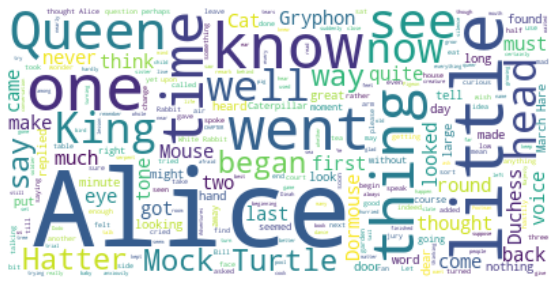

In [83]:
plt.figure(figsize=(10,5))
plt.imshow(alice_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

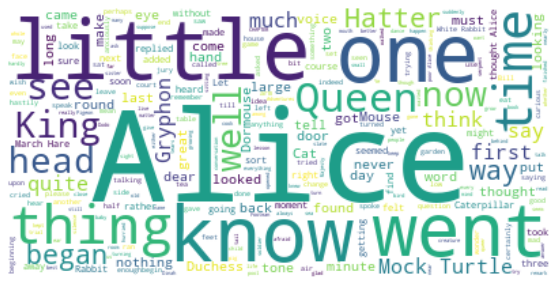

In [84]:
# update stopwords by adding word 'said'
for stopword in ["said", "go", "will", "oh"]:
    STOPWORDS.add(stopword)

#regenerate new wordcloud
alice_wordcloud.generate(alice)

plt.figure(figsize=(10,5))
plt.imshow(alice_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [85]:
alice_img = Image.open("data/alice_mask.JPEG")
alice_mask = np.array(alice_img)
print(alice_mask.shape)

(900, 900, 3)


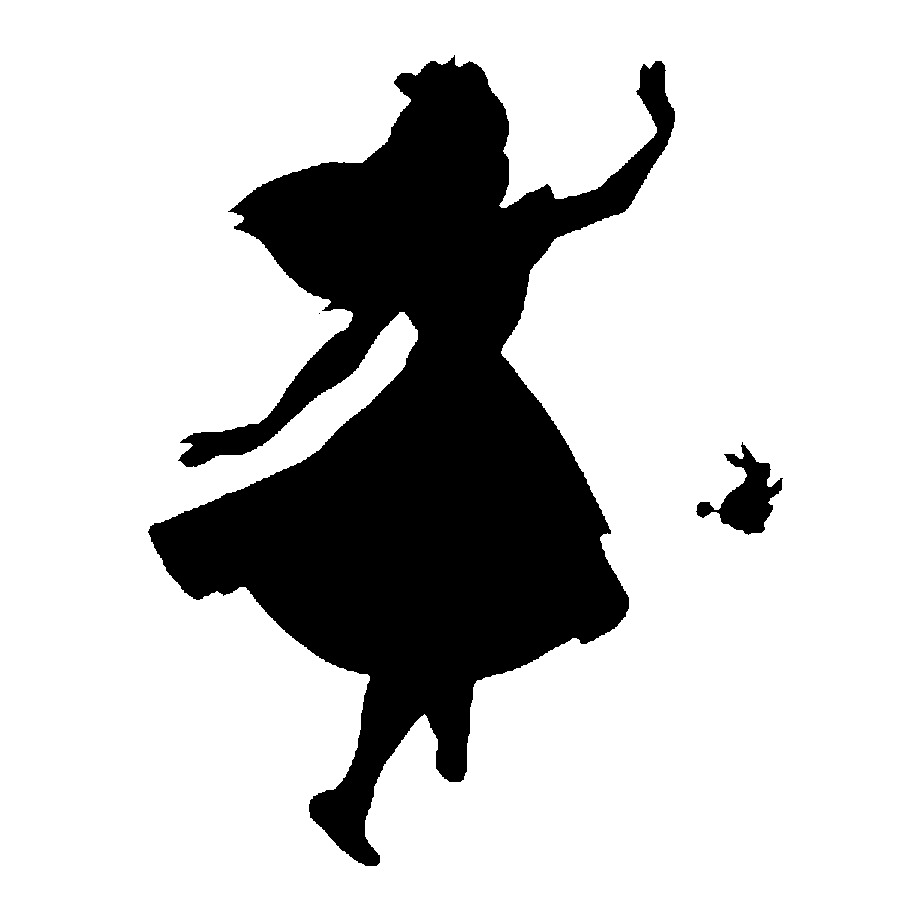

In [86]:
alice_img

In [87]:
print(alice_mask[:10, :10])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 2

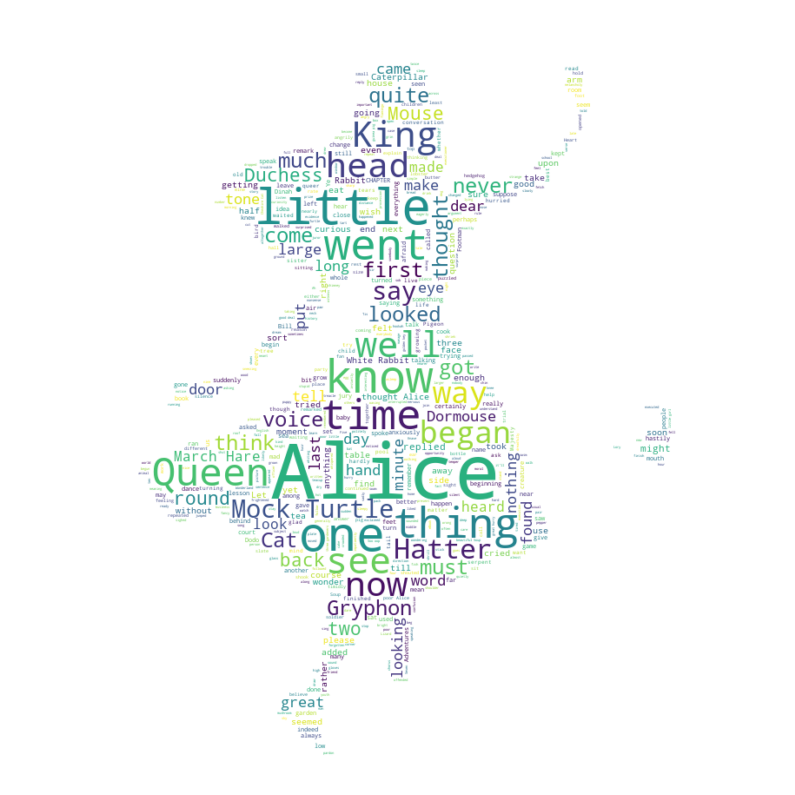

In [90]:
alice_wordcloud = WordCloud(background_color="White",
                           max_words=2000,
                           stopwords=STOPWORDS,
                           mask=alice_mask)
                           
alice_wordcloud.generate(alice)

plt.figure(figsize=(14, 18))
plt.imshow(alice_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [71]:
canada = pd.read_excel("data/Canada.xlsx", sheet_name="Canada by Citizenship", skiprows=range(20), skipfooter=2)
canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [68]:
canada.shape

(195, 43)

In [72]:
canada.drop(["AREA", "REG", "DEV", "Type", "Coverage"], axis=1, inplace=True)

canada.rename(
    columns={
        "OdName": "Country",
        "AreaName": "Continent",
        "Regname": "RegName"
    },
    inplace=True
)

canada.set_index("Country", inplace=True)

canada["Total"] = canada.sum(axis=1)
years=list(range(1980, 2014))

canada.head()

,Continent,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [75]:
max_words = 90

word_string =""
for country in canada.index:
    num_repeat = int(canada.loc[country, "Total"] / float(canada.Total.sum()) * max_words)
    word_string = word_string + ((country + " ") * num_repeat)
    
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Iran (Islamic Republic of) Iran (Islamic Republic of) Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Republic of Korea Republic of Korea Romania Sri Lanka Sri Lanka United Kingdom of Great Britain and Northern Ireland United Kingdom of Great Britain and Northern Ireland United Kingdom of Great Britain and Northern Ireland United Kingdom of Great Britain and Northern Ireland United Kingdom of Great Britain and Northern Ireland United Kingdom of Great Britain and Northern Ireland United Kingdom of Great Britain and Northern Ireland United States of America United States of America United States of America Viet Nam '

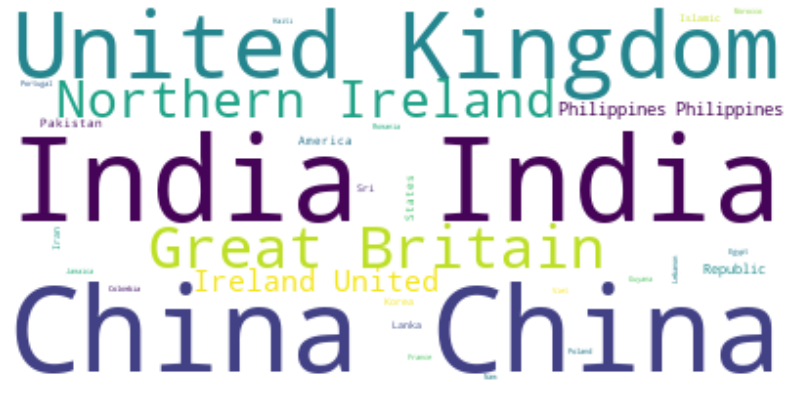

In [77]:
country_wordcloud = WordCloud(background_color="White").generate(word_string)

plt.figure(figsize=(14, 18))
plt.imshow(country_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Regression Plots Using Seaborn

In [98]:
years = list(range(1980, 2014))
df_total = pd.DataFrame(canada[years].sum(axis=0))
df_total.reset_index(inplace=True)
df_total.columns = ["years", "total"]
df_total.head()

,years,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


C:\Users\Windi aulia\anaconda3\envs\hacktiv8-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='years', ylabel='total'>

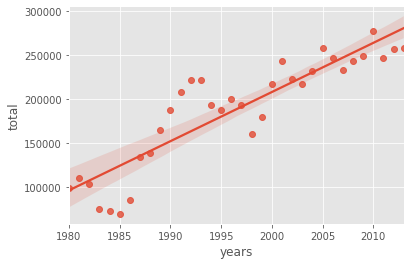

In [99]:
sns.regplot(df_total["years"], df_total["total"])

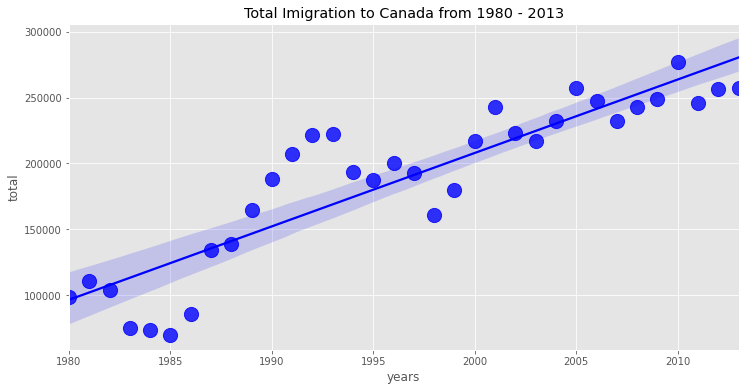

In [104]:
plt.figure(figsize=(12, 6))
sns.regplot(
    x="years", y="total", data=df_total,
    color="blue", marker="o", scatter_kws={"s": 200}
)
plt.title("Total Imigration to Canada from 1980 - 2013")
plt.show()

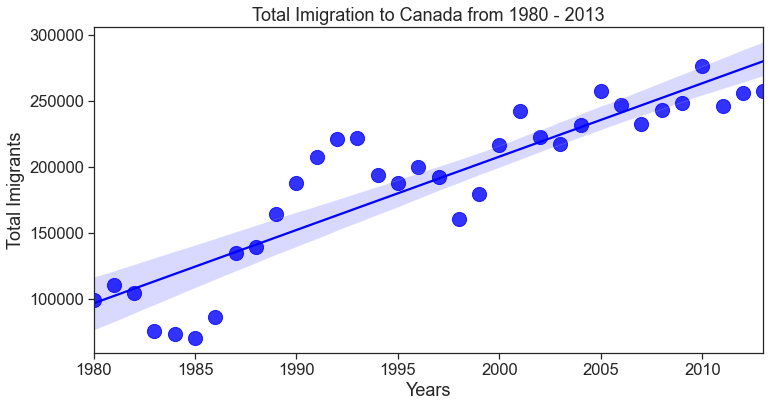

In [106]:
plt.figure(figsize=(12, 6))

# seaborn plot configuration
sns.set(font_scale=1.5)
sns.set_style("ticks")

# seaborn plot function
sns.regplot(
    x="years", y="total", data=df_total,
    color="blue", marker="o", scatter_kws={"s": 200}
)
plt.title("Total Imigration to Canada from 1980 - 2013")
plt.ylabel("Total Imigrants")
plt.xlabel("Years")
plt.show()

In [110]:
print("folium version:", folium.__version__)

folium version: 0.11.0


In [113]:
world_map=folium.Map()

In [114]:
world_map

In [120]:
semarang= folium.Map(location=[-6.992620, 110.428099], zoom_start=8)
semarang

In [119]:
hacktiv8 = folium.Map(location=[-6.2607187, 106.7794275], zoom_start=16, tiles ="Stamen Toner")
hacktiv8

In [117]:
incidents = pd.read_csv("data/incidents.csv")
print("shape:", incidents.shape)
incidents.head()

shape: (150500, 13)


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [121]:
sample_incidents = incidents.sample(n=100, random_state=1)
sample_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
87038,160850828,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,10/19/2016 12:00:00 AM,00:15,MISSION,NONE,1900 Block of MISSION ST,-122.419677,37.765851,"(37.7658510977435, -122.41967661615)",16085082864070
131171,166244869,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Saturday,10/08/2016 12:00:00 AM,13:13,RICHMOND,NONE,GEARY BL / 24TH AV,-122.483664,37.780140,"(37.7801399018132, -122.483663577628)",16624486906244
64524,160652721,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Friday,08/12/2016 12:00:00 AM,23:00,MISSION,NONE,200 Block of HARTFORD ST,-122.433597,37.758544,"(37.7585437043023, -122.43359736099)",16065272128160
48207,160494169,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Saturday,06/18/2016 12:00:00 AM,01:17,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16049416964020
92483,160897767,NON-CRIMINAL,FOUND PROPERTY,Friday,11/04/2016 12:00:00 AM,05:15,TENDERLOIN,NONE,300 Block of EDDY ST,-122.412931,37.783834,"(37.7838344374141, -122.412930522059)",16089776772000


In [3]:
# SP latitude and longitude
latitude = 37.77
longitude = -122.42

sf_map = folium.Map(location=(latitude, longitude), zoom_start=12)
sf_map

In [131]:
incidents_loc=folium.map.FeatureGroup()

for lat, lng in zip(sample_incidents.Y, sample_incidents.X):
    incidents_loc.add_child(
        folium.CircleMarker(
            (lat, lng),
            radius=5,
            color="yellow",
            fill=True,
            fill_color="blue",
            fill_opacity=.6
        )
    )
    
for lat, lng, cat in zip(sample_incidents.Y, sample_incidents.X, sample_incidents.Category):
    folium.Marker((lat, lng), popup=cat).add_to(sf_map)

sf_map.add_child(incidents_loc)

In [142]:
sf_map = folium.Map(location=(latitude, longitude), zoom_start=12)

incidents_cluster = plugins.MarkerCluster().add_to(sf_map)

for lat, lng, cat in zip(sample_incidents.Y, sample_incidents.X, sample_incidents.Category):
    folium.Marker(
        location=(lat, lng),
        icon=None,
        popup= cat,
    ).add_to(incidents_cluster)
    
sf_map